In [9]:
import matplotlib.pylab as plt
import numpy as np
import zlib
import glob
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from generator_class import DataGenerator
from tensorflow.keras.optimizers import SGD
import json
import argparse
import pandas as pd
#GPU/CPU Selection
gpu_setting = 'y'


In [3]:
plt.style.use('/home/sophiaf/mystyle.mplstyle')

In [4]:
history_file = 'CNN/ResNet_v2_20240106_urllist012_debugtraining_history.json' # 'ResNet_v2_128training_history.json'

# history_file = 'CNN/ResNet_v2_20240104_urllist0training_history.json' # 'ResNet_v2_128training_history.json'
# Opening JSON file
f = open(history_file)
# returns JSON object as 
# a dictionary
hst = json.load(f)
f.close()

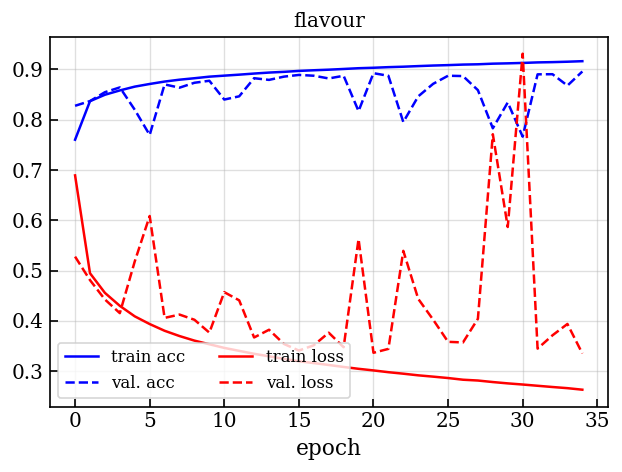

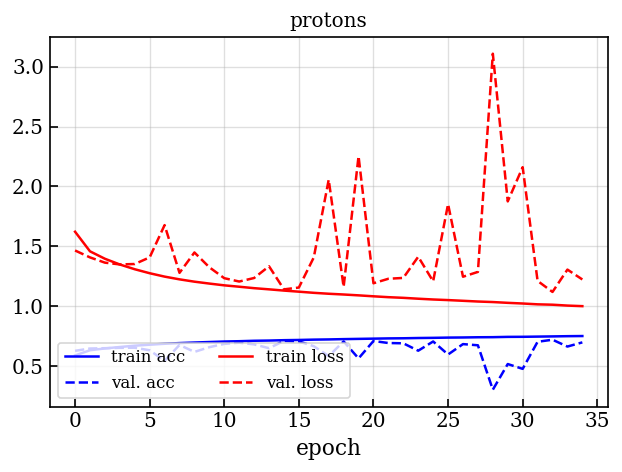

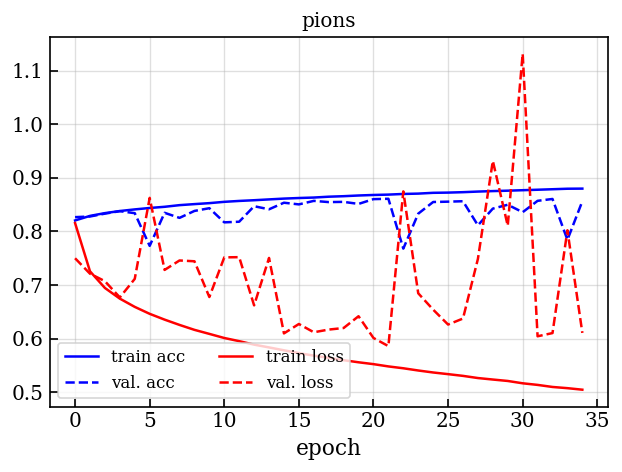

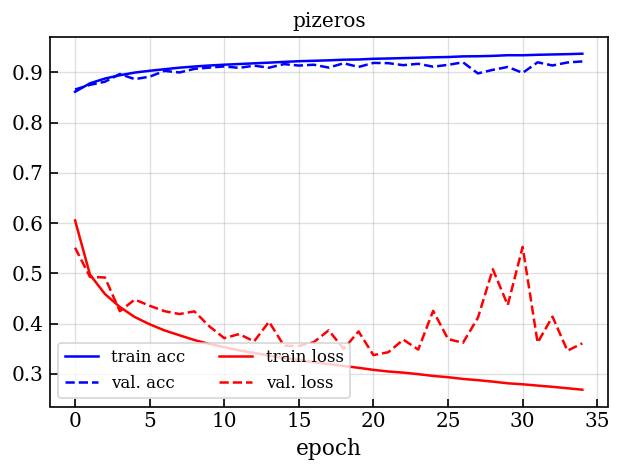

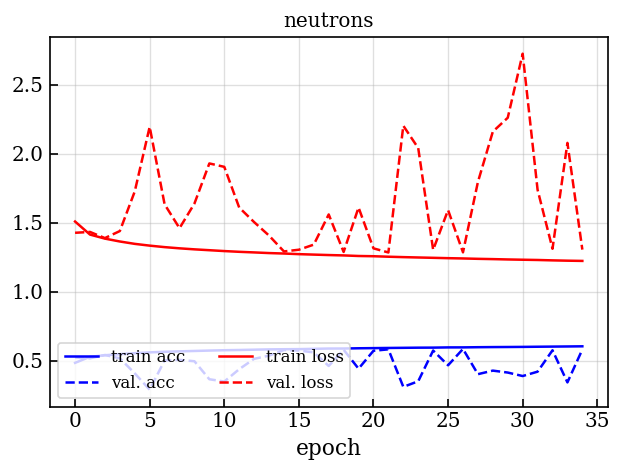

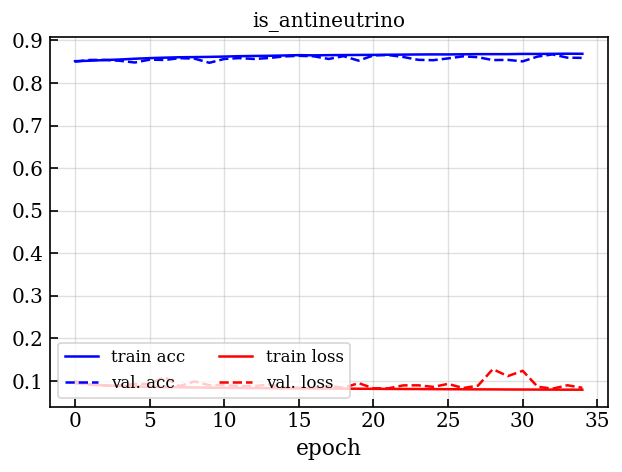

In [8]:
things_to_plot = ['flavour', 'protons', 'pions', 'pizeros', 'neutrons', 'is_antineutrino']
for thing_to_plot in things_to_plot:
    plt.plot(hst['%s_accuracy'%(thing_to_plot)], c='b', ls='-', label='train acc')
    plt.plot(hst['val_%s_accuracy'%(thing_to_plot)], c='b', ls='--', label='val. acc')
    plt.plot(hst['%s_loss'%(thing_to_plot)], c='r', ls='-', label='train loss')
    plt.plot(hst['val_%s_loss'%(thing_to_plot)], c='r', ls='--', label='val. loss')
    # plt.ylim(0.25,.9)
    plt.legend(loc='lower left', ncol=2)
    plt.xlabel('epoch')
    plt.grid()
    plt.title(thing_to_plot)
    # plt.savefig('CNN/plots/history_%s_20231223.pdf'%(thing_to_plot))
    plt.show()

In [10]:
tests = pd.read_pickle('CNN/ResNet_20240106_urllist0_1_2_predictions.pkl')

In [14]:
tests['pred']

[array([[5.2045614e-01, 5.4737357e-03, 4.7407007e-01],
        [3.8966498e-01, 3.1019781e-02, 5.7931530e-01],
        [7.2996835e-03, 6.7547936e-04, 9.9202490e-01],
        ...,
        [9.9137199e-01, 3.9347778e-03, 4.6931542e-03],
        [2.0359823e-01, 7.8310853e-01, 1.3293206e-02],
        [1.1858012e-01, 7.9199487e-01, 8.9425035e-02]], dtype=float32),
 array([[2.5745681e-02, 9.5241040e-01, 2.1544123e-02, 2.9973852e-04],
        [2.1548218e-01, 7.3852926e-01, 4.4611234e-02, 1.3773431e-03],
        [7.6658177e-01, 1.6822487e-01, 3.9761540e-02, 2.5431715e-02],
        ...,
        [4.6931306e-01, 5.2387393e-01, 6.5119551e-03, 3.0102447e-04],
        [7.6766387e-02, 9.2184389e-01, 1.3753095e-03, 1.4365461e-05],
        [1.3320464e-01, 3.6530179e-01, 3.8069028e-01, 1.2080330e-01]],
       dtype=float32),
 array([[6.9657534e-02, 8.7823027e-01, 5.1072646e-02, 1.0395297e-03],
        [2.7997294e-01, 6.7711663e-01, 4.1961581e-02, 9.4886887e-04],
        [9.6382928e-01, 3.5344221e-02, 7.82